In [ ]:
id

1
1
2
2
7
7
7
7

Trip Type prediction

#### Пример когда мы хотим часть его записей поместить в TRAIN а часть в TEST

- Персонализированные предсказания
    - Привычки
    - Рекомендации музыки
   

In [ ]:
X-ray ~100k 
Computed Tomography

Andrew Ng



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/anvar/private_datasets/anvar_work/home_directory_old/home_directory/ml_ds_materials/time_series/ds_dahab/ds_dahab/wind_data_dahab.csv')
data.index = pd.to_datetime(data['timestamp'], unit='s')

data.drop(['meteostationID', 'timestamp',
           'temperature', 'pressure',
           'humidity'], axis=1, inplace=True)

In [4]:
data.head(20)

,wind_max_ms,wind_min_ms,wind_avg_ms,wind_direction
timestamp,,,,
2018-10-25 16:28:42,0.0,0.0,0.0,200.742188
2018-10-25 16:29:54,5.8,0.0,2.4,342.421875
2018-10-30 13:46:53,4.1,2.1,3.1,29.531250
2018-10-30 13:52:02,3.5,2.5,2.9,44.296875
2018-10-30 14:02:21,3.5,1.2,2.2,32.695312
2018-10-30 14:07:30,3.6,1.3,2.7,24.257812
2018-10-30 14:12:39,3.5,1.5,2.5,10.898438
2018-10-30 14:17:47,2.7,0.8,1.6,354.726562
2018-10-30 14:22:56,2.2,0.0,1.5,349.101562


In [ ]:
[----------------|----]
[0---------------100------150]



In [ ]:
X - время
y - сила ветра

In [6]:
data_november = data.truncate(before='2018-11-01', after='2018-11-30')
x = data_november.wind_avg_ms.values

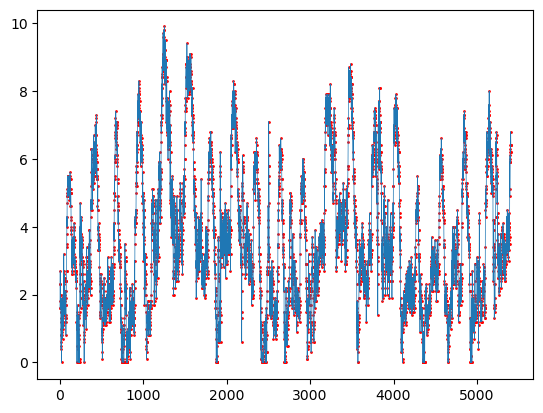

In [7]:
plt.plot(x, lw=0.5)
plt.scatter(np.arange(len(x)), x, s=1, c='r')

In [8]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

y_train = data_november.wind_avg_ms.values
data_november_test = data.truncate(before='2018-11-07', after='2018-11-08')
y_test = data_november_test.wind_avg_ms.values[:72]
X_train = np.arange(len(y_train)).reshape(-1, 1)

model.fit(X_train, y_train)

LinearRegression()

In [15]:
X_test = np.arange(len(y_train), len(y_train)+72).reshape(-1,1)
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mean_squared_error(y_pred, y_test)

0.7476584503805999

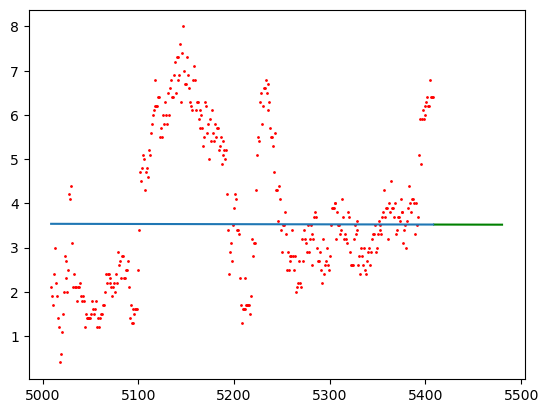

In [20]:
# plt.plot(X_train[-400:], y_train[-400:], lw=0.5, c='r')
plt.scatter(X_train[-400:], y_train[-400:], s=1, c='r')

# plt.plot(X_test, y_test, lw=.5)
plt.plot(X_test, y_pred, c='green')

y_train_pred = model.predict(X_train)
plt.plot(X_train[-400:], y_train_pred[-400:])

X - признаки = описание каждого наблюдения 

y - зависимая величина = то что хотим предсказывать

### Посмотрим сколько у нас записей по месяцам

In [21]:
np.unique(data.index.month_name(), return_counts=True)

(array(['December', 'February', 'January', 'March', 'November', 'October'],
       dtype=object),
 array([2990, 4807, 6706, 2301, 5409,  206]))

### Предлагаю для начала взять Ноябрь

In [22]:
data_november = data.truncate(before='2018-11-01', after='2018-11-30')
data_november.shape

(5409, 4)

In [23]:
data_november.head(3)

,wind_max_ms,wind_min_ms,wind_avg_ms,wind_direction
timestamp,,,,
2018-11-01 00:04:58,3.7,0.2,1.6,299.179688
2018-11-01 00:10:06,4.0,0.8,2.3,319.921875
2018-11-01 00:15:15,4.0,1.5,2.7,291.445312


In [24]:
data_november.tail(3)

,wind_max_ms,wind_min_ms,wind_avg_ms,wind_direction
timestamp,,,,
2018-11-20 08:17:48,8.0,5.1,6.4,24.609375
2018-11-20 08:22:57,7.8,4.2,6.4,30.937500
2018-11-20 08:23:02,7.8,4.2,6.4,30.937500


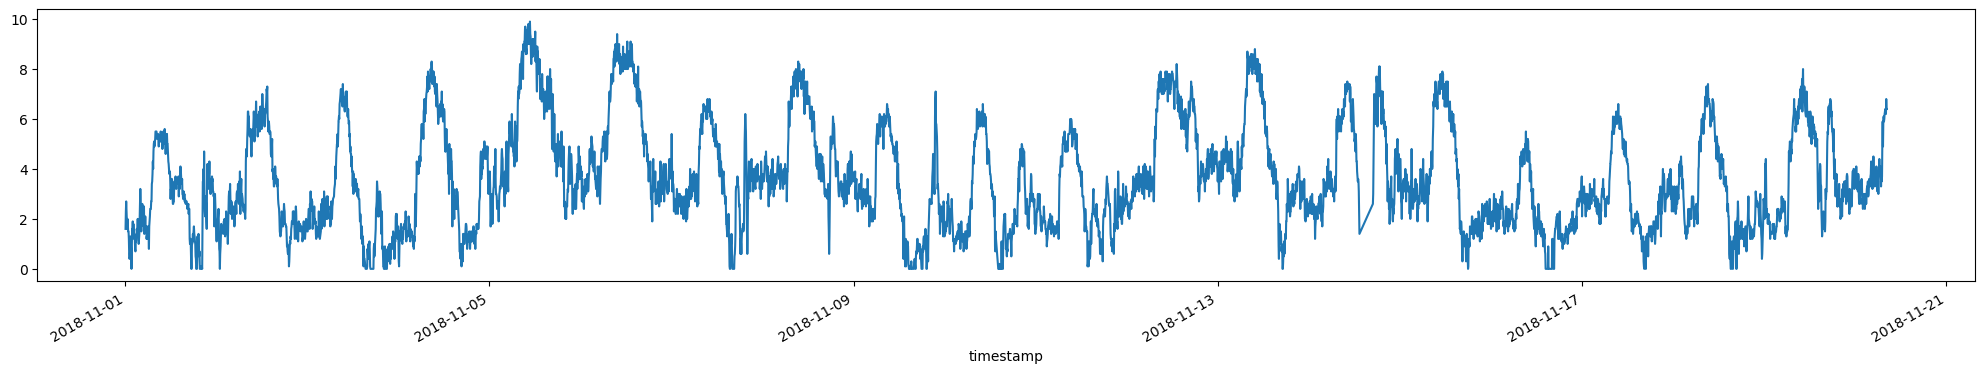

In [25]:
data_november['wind_avg_ms'].plot(figsize=(25,4));

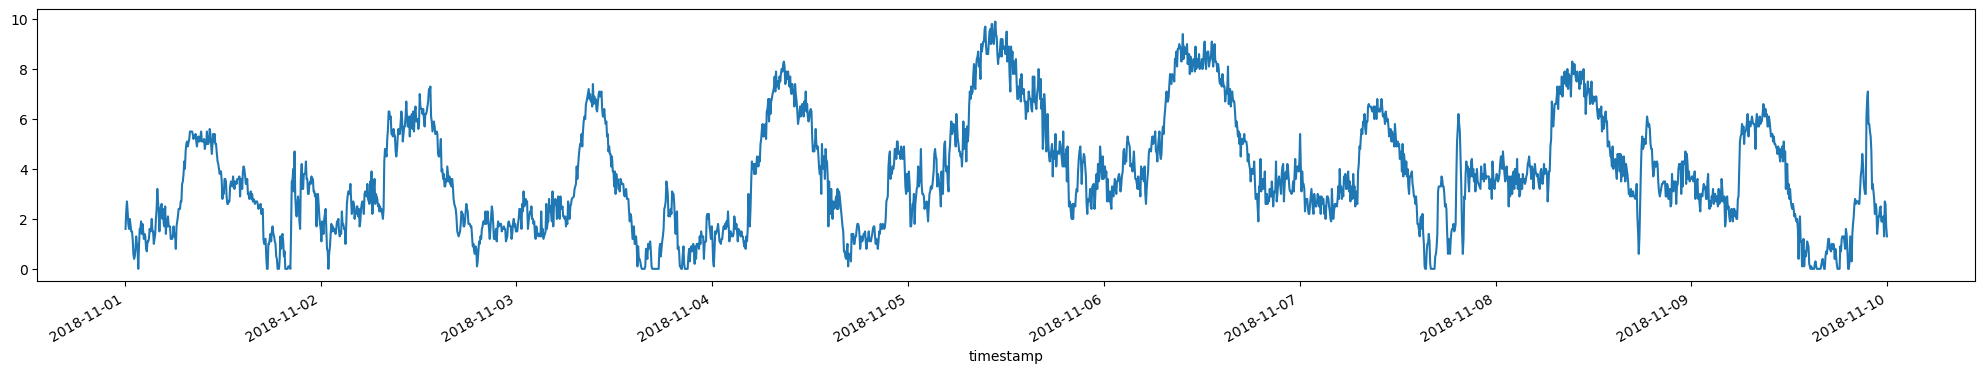

In [26]:
data_november['wind_avg_ms'].truncate(after='2018-11-10').plot(figsize=(25,4));

### В ноябре у нас есть истинные показатели силы ветра за 20 дней.

Давайте разделим временной ряд на две части: будем использовать первые 15 дней для выбора наилучшей модели и ее гиперпараметров. Оставшиеся 5 дней будем использовать для тестирования модели.

In [27]:
data_november_train = data_november.truncate(after='2018-11-15')
data_november_test = data_november.truncate(before='2018-11-15')

In [31]:
data_november_train.tail()

,wind_max_ms,wind_min_ms,wind_avg_ms,wind_direction
timestamp,,,,
2018-11-14 23:37:38,4.5,2.1,3.1,352.968750
2018-11-14 23:42:46,6.6,2.2,4.6,335.742188
2018-11-14 23:49:05,6.3,1.5,3.4,306.210938
2018-11-14 23:54:12,5.3,1.7,3.5,347.343750
2018-11-14 23:59:21,6.3,2.0,4.4,7.031250


In [33]:
data_november_test.head()

,wind_max_ms,wind_min_ms,wind_avg_ms,wind_direction
timestamp,,,,
2018-11-15 00:04:29,6.3,2.6,4.4,335.390625
2018-11-15 00:09:38,6.3,2.5,4.4,338.554688
2018-11-15 00:14:46,5.3,1.5,3.4,302.695312
2018-11-15 00:19:55,5.3,1.1,2.7,342.070312
2018-11-15 00:25:03,4.3,1.1,2.6,350.859375


### Начнем с предсказания среднего значения ветра

Вам необходимо решить как именно вы хотите делать предсказания на K шагов вперед. Пример с подсчетом признака "лаг 1." ($Y_0$ для $Y_1$;  $Y_{17}$ для $Y_{18}$ и т.д.). Обучились на первых N точках и хотим предсказывать следующие K точек. Как посчитать признак "лаг 1" для этих K точек?

- Вариант 1:  Для точки N+1, признак "лаг 1" это $Y_N$, его мы можем посчитать он в наших N точках есть. Но откуда брать "лаг 1" для точки N+2? Ответ: предсказывать значение $Y_{N+1}$ и подставлять его в качестве признака. Аналогично действовать при генерации других признаков: Те признаки для которых нужна тестовая выборка генерить на ходу по предсказанным значениям.

- Вариант 2: Выбрали предсказательный горизонт K и генерите авторегрессионные фичи с лагом K таким образом у вас всегда будет хватать трейновой выборки для генерации признаков в тест. Минус такого подхода в том что вы используете последние K тактов из тренировочной выборки.

# Вариант 1. 
Предсказание на один (1) такт вперед, расчет будущих признаков на основе предсказаний модели.

## Train

In [34]:
X_wind = data['wind_avg_ms']

In [35]:
X_wind

timestamp
2018-10-25 16:28:42    0.0
2018-10-25 16:29:54    2.4
2018-10-30 13:46:53    3.1
2018-10-30 13:52:02    2.9
2018-10-30 14:02:21    2.2
                      ... 
2019-03-12 09:48:17    4.8
2019-03-12 09:53:26    5.3
2019-03-12 09:58:34    4.9
2019-03-12 10:03:43    5.0
2019-03-12 10:08:51    4.6
Name: wind_avg_ms, Length: 22419, dtype: float64

In [36]:
X = pd.DataFrame(index=X_wind.index)
for i in range(1, 13):
    X['lag_{}'.format(i)] = X_wind.shift(i)

In [37]:
X.merge(X_wind, left_index=True, right_index=True)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,wind_avg_ms
timestamp,,,,,,,,,,,,,
2018-10-25 16:28:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2018-10-25 16:29:54,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4
2018-10-30 13:46:53,2.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.1
2018-10-30 13:52:02,3.1,2.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9
2018-10-30 14:02:21,2.9,3.1,2.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-12 09:48:17,4.5,4.7,4.6,5.6,5.5,5.7,5.8,5.9,5.9,5.7,5.9,6.1,4.8
2019-03-12 09:53:26,4.8,4.5,4.7,4.6,5.6,5.5,5.7,5.8,5.9,5.9,5.7,5.9,5.3
2019-03-12 09:58:34,5.3,4.8,4.5,4.7,4.6,5.6,5.5,5.7,5.8,5.9,5.9,5.7,4.9


Признаки - сила ветра за последний час

Надо предсказывать силу ветра через 2 часа - 

t+1, t+2, t+3, 

In [43]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [39]:
X_train = pd.DataFrame(data_november_train['wind_avg_ms'])
X_test = pd.DataFrame(data_november_test['wind_avg_ms'])

In [45]:
def lin_reg(X):
    n = X.shape[0]
    x = np.concatenate((np.ones(n),
                        np.arange(n)),
                      ).reshape(2, n).T
    
    y = X.reshape(-1,1)
    theta = np.linalg.pinv(x.dot(x.T)).dot(x).T.dot(y)

    return np.array([[1, n]]).dot(theta)

In [67]:
def generate_autoregressive(x, test=False):
        
    X = pd.DataFrame(index=x.index)
    for i in range(1, 13):
        X['lag_{}'.format(i)] = x.shift(i)
    
        
    X['lin_reg3'] = x.shift(1).rolling(window=3).apply(lin_reg, raw=True)
    X['lin_reg5'] = x.shift(1).rolling(window=5).apply(lin_reg, raw=True)
    X['lin_reg12'] = x.shift(1).rolling(window=12).apply(lin_reg, raw=True)
#     X['lin_reg3'] = x.shift(1).rolling(window=3).apply(np.mean, raw=True)
#     X['lin_reg5'] = x.shift(1).rolling(window=5).apply(np.mean, raw=True)
#     X['lin_reg12'] = x.shift(1).rolling(window=12).apply(np.mean, raw=True)
     
    if test:
        return X.dropna()
    
    X['y'] = x['wind_avg_ms']
    return X.dropna()

In [68]:
train = generate_autoregressive(X_train)

model_ridge = Ridge(alpha=0.1)
model_lasso = Lasso(alpha=0.1)
model_tree = DecisionTreeRegressor(max_depth=50, min_samples_leaf=5)

model_ridge.fit(train.drop('y', axis=1), train['y'])
model_lasso.fit(train.drop('y', axis=1), train['y'])
model_tree.fit(train.drop('y', axis=1), train['y']);

In [69]:
pd.DataFrame(data_november_train['wind_avg_ms']).head(15)

,wind_avg_ms
timestamp,
2018-11-01 00:04:58,1.6
2018-11-01 00:10:06,2.3
2018-11-01 00:15:15,2.7
2018-11-01 00:20:24,2.3
2018-11-01 00:25:32,1.8
2018-11-01 00:30:40,1.6
2018-11-01 00:35:49,2.0
2018-11-01 00:40:57,1.8
2018-11-01 00:46:06,1.5


<AxesSubplot:>

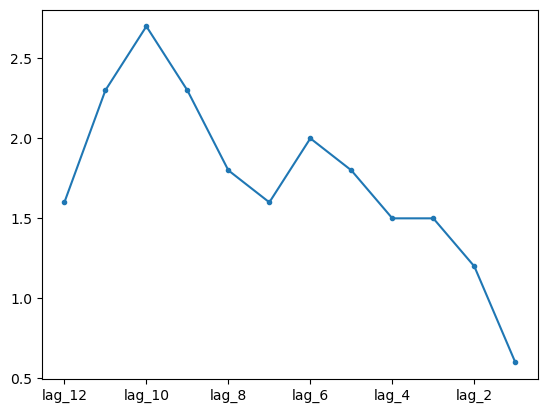

In [70]:
train[[f'lag_{i}' for i in range(1,13)]].iloc[0][::-1].plot(marker='.')

In [71]:
train.head(3)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lin_reg3,lin_reg5,lin_reg12,y
timestamp,,,,,,,,,,,,,,,,
2018-11-01 01:07:49,0.6,1.2,1.5,1.5,1.8,2.0,1.6,1.8,2.3,2.7,2.3,1.6,0.200000,5.100000e-01,0.993939,0.4
2018-11-01 01:12:57,0.4,0.6,1.2,1.5,1.5,1.8,2.0,1.6,1.8,2.3,2.7,2.3,-0.066667,1.100000e-01,0.516667,0.5
2018-11-01 01:18:06,0.5,0.4,0.6,1.2,1.5,1.5,1.8,2.0,1.6,1.8,2.3,2.7,0.400000,5.495604e-15,0.275758,0.8


> 1. Поиграйте с параметрами регуляризации и посмотрите как изменяются веса признаков model.coef_ model.intercept_

In [72]:
results = pd.DataFrame(index=train.index)
results['y'] = train['y']
results['y_pred_ridge'] = model_ridge.predict(train.drop('y', axis=1))
results['y_pred_lasso'] = model_lasso.predict(train.drop('y', axis=1))
results['y_pred_tree'] = model_tree.predict(train.drop('y', axis=1))

_r = results.truncate(after='2018-11-03')
time = _r.index

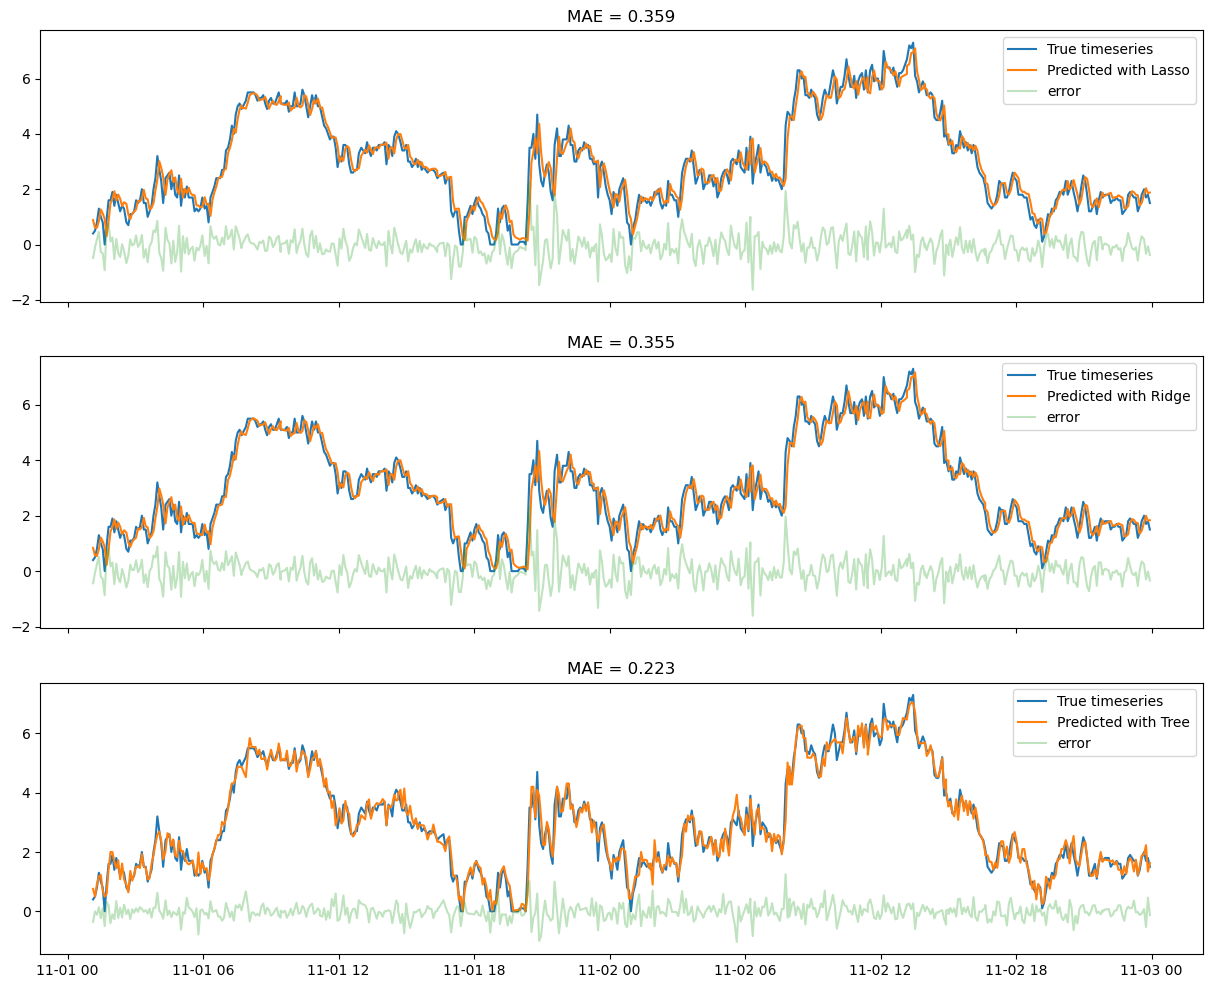

In [73]:
fig, ax = plt.subplots(3,1,sharex=True, figsize=(15,12))

ax[0].set_title('MAE = {:.3f}'.format(mean_absolute_error(results['y'], results['y_pred_lasso'])))
ax[0].plot(time, _r['y'], label='True timeseries')
ax[0].plot(time, _r['y_pred_lasso'], label='Predicted with Lasso')
ax[0].plot(time, _r['y'] - _r['y_pred_lasso'], label='error', alpha=.3)
ax[0].legend()

ax[1].set_title('MAE = {:.3f}'.format(mean_absolute_error(results['y'], results['y_pred_ridge'])))
ax[1].plot(time, _r['y'], label='True timeseries')
ax[1].plot(time, _r['y_pred_ridge'], label='Predicted with Ridge')
ax[1].plot(time, _r['y'] - _r['y_pred_ridge'], label='error', alpha=.3)
ax[1].legend()

ax[2].set_title('MAE = {:.3f}'.format(mean_absolute_error(results['y'], results['y_pred_tree'])))
ax[2].plot(time, _r['y'], label='True timeseries')
ax[2].plot(time, _r['y_pred_tree'], label='Predicted with Tree')
ax[2].plot(time, _r['y'] - _r['y_pred_tree'], label='error', alpha=.3)
ax[2].legend();

In [75]:
train.head(3)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lin_reg3,lin_reg5,lin_reg12,y
timestamp,,,,,,,,,,,,,,,,
2018-11-01 01:07:49,0.6,1.2,1.5,1.5,1.8,2.0,1.6,1.8,2.3,2.7,2.3,1.6,0.200000,5.100000e-01,0.993939,0.4
2018-11-01 01:12:57,0.4,0.6,1.2,1.5,1.5,1.8,2.0,1.6,1.8,2.3,2.7,2.3,-0.066667,1.100000e-01,0.516667,0.5
2018-11-01 01:18:06,0.5,0.4,0.6,1.2,1.5,1.5,1.8,2.0,1.6,1.8,2.3,2.7,0.400000,5.495604e-15,0.275758,0.8


In [74]:
model_ridge.coef_

array([ 0.25350134, -0.04517705,  0.13728776,  0.00201239,  0.05347684,
        0.01286492,  0.01625841, -0.00361987,  0.02572836, -0.01709853,
        0.03216239, -0.02089776,  0.2314176 ,  0.18607812,  0.1156709 ])

> 2. В качестве упражнения построите предсказание последним значением: $\hat{y}_t = y_{t-1}$ и посчитайте его MAE

### Взглянем на распределение остатков

In [76]:
from scipy.stats import normaltest

In [77]:
error = results['y'] - results['y_pred_lasso']

print(error.mean(), error.std())

-2.3353262695590167e-16 0.47412723803905127


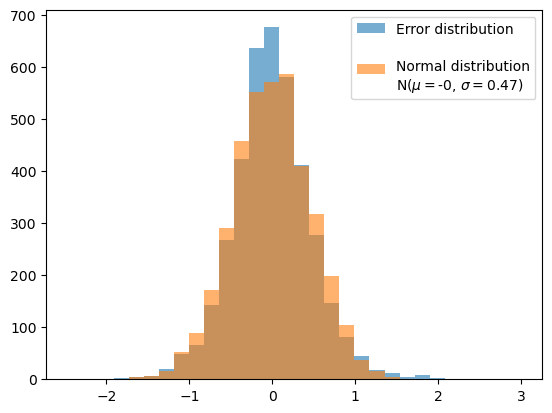

In [78]:
normal = np.random.normal(loc=error.mean(),
                          scale=error.std(),
                          size=error.shape[0])

bins = plt.hist(error, bins=30, alpha=0.6, label='Error distribution');

plt.hist(normal, bins=bins[1], alpha=.6,
         label='\nNormal distribution\nN($\mu =${:.0f}, $\sigma =${:.2f})'.format(error.mean(), error.std()));

plt.legend();

In [36]:
normaltest(error)

NormaltestResult(statistic=165.49208666414927, pvalue=1.1583771485400562e-36)

Распределение остатков очень похоже на нормальное со средним в 0

----

## Test

In [79]:
X_train.tail(3)

,wind_avg_ms
timestamp,
2018-11-14 23:49:05,3.4
2018-11-14 23:54:12,3.5
2018-11-14 23:59:21,4.4


In [80]:
X_test.head(3)

,wind_avg_ms
timestamp,
2018-11-15 00:04:29,4.4
2018-11-15 00:09:38,4.4
2018-11-15 00:14:46,3.4


### Добавим 13 последних тайм степов из трейна

> 3. Вопрос: Почему именно 13?

Предсказывать будем на 2 часа вперед (т.е. 24 тайм степов)

> Вопрос: почему именно на 2 часа? Ответ: просто потому что можем.

**Hint** Рекомендую нарисовать картинку и изобразить на ней:
1. Какие моменты времени мы собираемся предсказывать
2. Из каких моментов времени генерятся признаки для предсказания

Помните что мы предсказываем на 24 тайм степов вперед, поэтому для генерации некоторых признаков у нас нет значений временного ряда $y_t$. Вместо них мы будем использовать свои предсказания $\hat{y}_t$.

In [83]:
n_steps_predict=12*6

test = pd.concat((X_train.iloc[-13:], X_test), axis=0)
test.iloc[13:] = np.nan

In [84]:
def predict(x, model, n=24):

    y_pred = []
    for i in range(n):
        x_features = generate_autoregressive(x.iloc[i: 13+i], test=True)
        y_pred.append(model.predict(x_features))      
        x.iloc[13+i] = y_pred[i]
        
    return np.array(y_pred).reshape(-1)

In [85]:
results_test = pd.DataFrame(index=X_test.index)
results_test['y'] = X_test['wind_avg_ms']
results_test['y_pred_ridge'] = np.nan
results_test['y_pred_lasso'] = np.nan
results_test['y_pred_tree'] = np.nan

results_test['y_pred_ridge'].iloc[:n_steps_predict] = predict(test, model_ridge, n=n_steps_predict)
results_test['y_pred_lasso'].iloc[:n_steps_predict] = predict(test, model_lasso, n=n_steps_predict)
results_test['y_pred_tree'].iloc[:n_steps_predict] = predict(test, model_tree, n=n_steps_predict)

In [86]:
_r = results_test.dropna()
time = _r.index

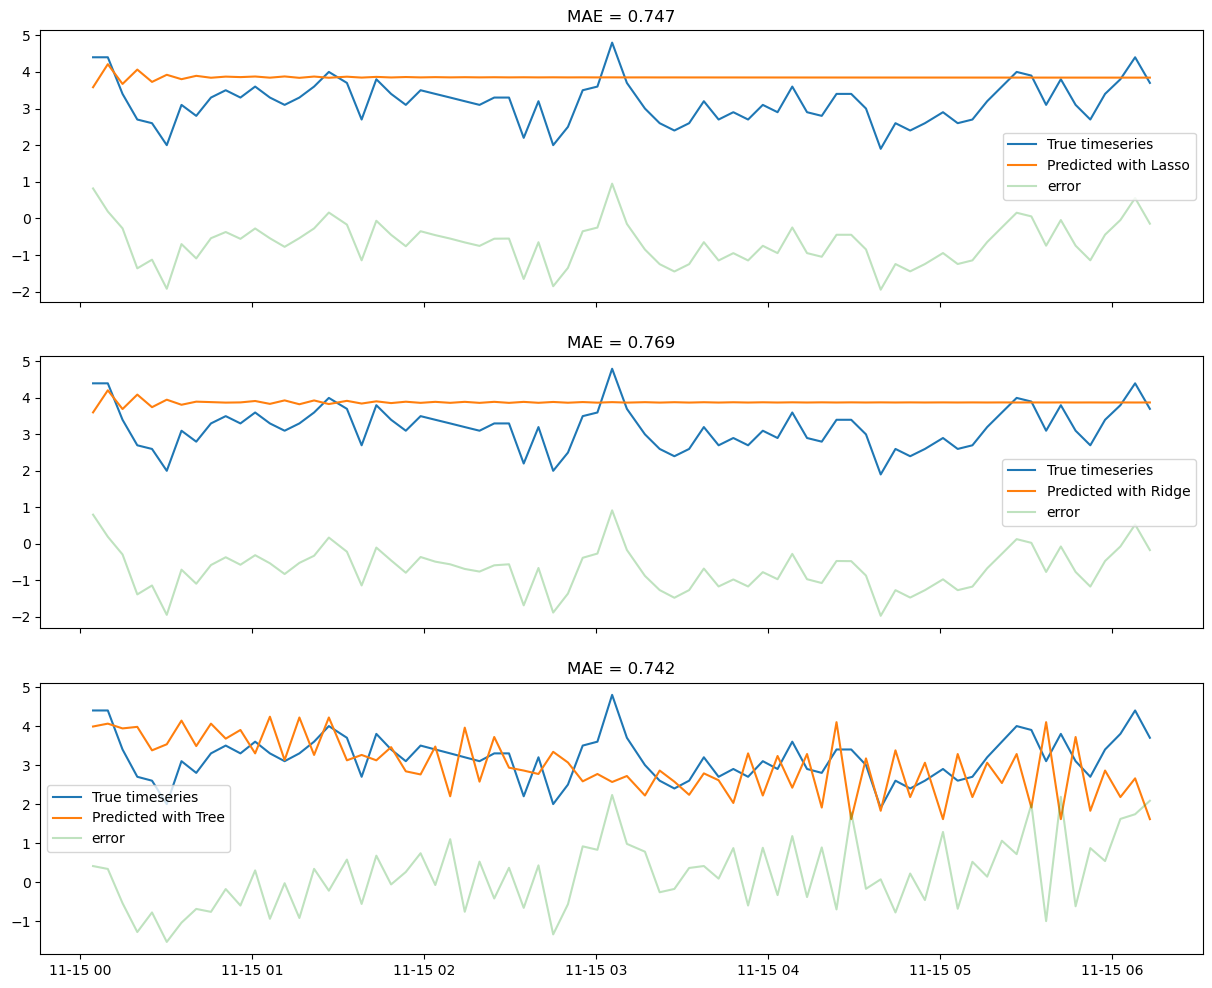

In [87]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15,12))


ax[0].set_title('MAE = {:.3f}'.format(mean_absolute_error(_r['y'], _r['y_pred_lasso'])))
ax[0].plot(time, _r['y'], label='True timeseries')
ax[0].plot(time, _r['y_pred_lasso'], label='Predicted with Lasso')
ax[0].plot(time, _r['y'] - _r['y_pred_lasso'], label='error', alpha=.3)
ax[0].legend()

ax[1].set_title('MAE = {:.3f}'.format(mean_absolute_error(_r['y'], _r['y_pred_ridge'])))
ax[1].plot(time, _r['y'], label='True timeseries')
ax[1].plot(time, _r['y_pred_ridge'], label='Predicted with Ridge')
ax[1].plot(time, _r['y'] - _r['y_pred_ridge'], label='error', alpha=.3)
ax[1].legend()

ax[2].set_title('MAE = {:.3f}'.format(mean_absolute_error(_r['y'], _r['y_pred_tree'])))
ax[2].plot(time, _r['y'], label='True timeseries')
ax[2].plot(time, _r['y_pred_tree'], label='Predicted with Tree')
ax[2].plot(time, _r['y'] - _r['y_pred_tree'], label='error', alpha=.3)
ax[2].legend();

In [44]:
data

,wind_max_ms,wind_min_ms,wind_avg_ms,wind_direction
timestamp,,,,
2018-10-25 16:28:42,0.0,0.0,0.0,200.742188
2018-10-25 16:29:54,5.8,0.0,2.4,342.421875
2018-10-30 13:46:53,4.1,2.1,3.1,29.531250
2018-10-30 13:52:02,3.5,2.5,2.9,44.296875
2018-10-30 14:02:21,3.5,1.2,2.2,32.695312
...,...,...,...,...
2019-03-12 09:48:17,5.8,3.7,4.8,17.226562
2019-03-12 09:53:26,6.3,4.0,5.3,24.609375
2019-03-12 09:58:34,6.2,4.0,4.9,21.445312


> 4. Постройте предсказания для следующих 24 тайм степов

# Вариант 2. 
Предсказание на K тактов вперед. Если предсказательный горизонт P меньше K, то все признаки можно генерить из истинных значений временного ряда.

In [98]:
12*24

288

In [114]:
def generate_autoregressive_K(x, start_lag=24, end_lag=37, test=False):
    
    
    X = pd.DataFrame(index=x.index)
    for i in range(start_lag, end_lag):
        X['lag_{}'.format(i)] = x.shift(i)
        
    X['lin_reg3'] = x.shift(start_lag).rolling(window=3).apply(lin_reg, raw=True)
    X['lin_reg5'] = x.shift(start_lag).rolling(window=5).apply(lin_reg, raw=True)
    X['lin_reg12'] = x.shift(start_lag).rolling(window=12).apply(lin_reg, raw=True)
    
    
    if test:
        return X.dropna()
    
    X['y'] = x['wind_avg_ms']
    return X.dropna()

## Train

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
train = generate_autoregressive_K(X_train)

model_ridge = Ridge(alpha=0.1)
model_lasso = Lasso(alpha=0.1)
# model_tree = DecisionTreeRegressor(max_depth=50, min_samples_leaf=5)
model_tree = RandomForestRegressor(n_estimators=20,max_depth=50, min_samples_leaf=5)

model_ridge.fit(train.drop('y', axis=1), train['y'])
model_lasso.fit(train.drop('y', axis=1), train['y'])
model_tree.fit(train.drop('y', axis=1), train['y']);

In [117]:
results = pd.DataFrame(index=train.index)
results['y'] = train['y']
results['y_pred_ridge'] = model_ridge.predict(train.drop('y', axis=1))
results['y_pred_lasso'] = model_lasso.predict(train.drop('y', axis=1))
results['y_pred_tree'] = model_tree.predict(train.drop('y', axis=1))

_r = results.truncate(after='2018-11-03')
time = _r.index

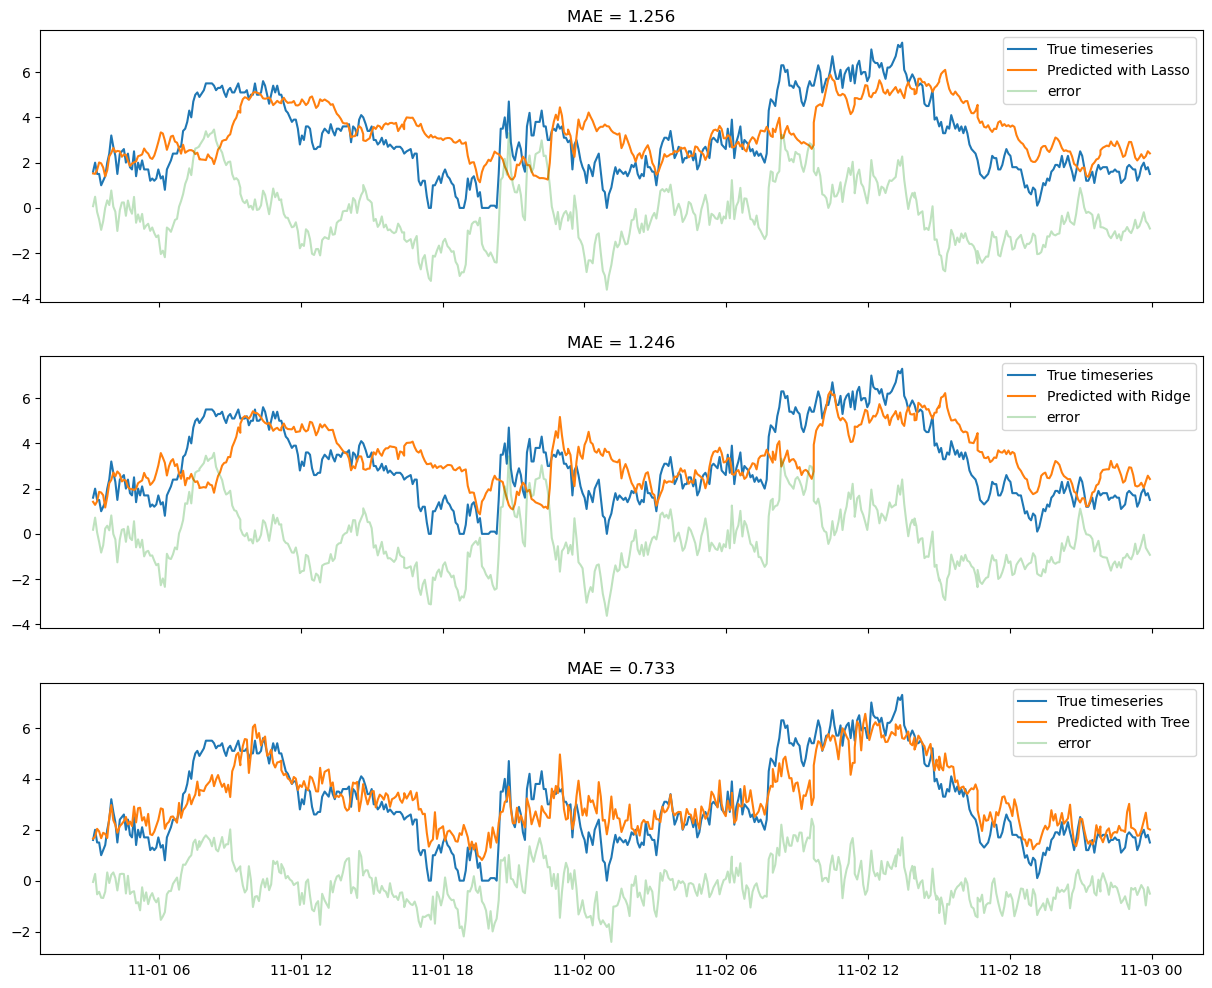

In [118]:
fig, ax = plt.subplots(3,1,sharex=True, figsize=(15,12))

ax[0].set_title('MAE = {:.3f}'.format(mean_absolute_error(results['y'], results['y_pred_lasso'])))
ax[0].plot(time, _r['y'], label='True timeseries')
ax[0].plot(time, _r['y_pred_lasso'], label='Predicted with Lasso')
ax[0].plot(time, _r['y'] - _r['y_pred_lasso'], label='error', alpha=.3)
ax[0].legend()

ax[1].set_title('MAE = {:.3f}'.format(mean_absolute_error(results['y'], results['y_pred_ridge'])))
ax[1].plot(time, _r['y'], label='True timeseries')
ax[1].plot(time, _r['y_pred_ridge'], label='Predicted with Ridge')
ax[1].plot(time, _r['y'] - _r['y_pred_ridge'], label='error', alpha=.3)
ax[1].legend()

ax[2].set_title('MAE = {:.3f}'.format(mean_absolute_error(results['y'], results['y_pred_tree'])))
ax[2].plot(time, _r['y'], label='True timeseries')
ax[2].plot(time, _r['y_pred_tree'], label='Predicted with Tree')
ax[2].plot(time, _r['y'] - _r['y_pred_tree'], label='error', alpha=.3)
ax[2].legend();

## Test

In [104]:
12*6

72

In [119]:
n_steps_predict=72
test = pd.concat((X_train.iloc[-84:], X_test), axis=0)

test.iloc[84:] = np.nan

In [123]:
test_features = generate_autoregressive_K(test, test=True)

results_test = pd.DataFrame(index=X_test.index)
results_test['y'] = X_test['wind_avg_ms']
results_test['y_pred_ridge'] = np.nan
results_test['y_pred_lasso'] = np.nan
results_test['y_pred_tree'] = np.nan

results_test['y_pred_ridge'].iloc[:n_steps_predict] = model_ridge.predict(test_features)
results_test['y_pred_lasso'].iloc[:n_steps_predict] = model_lasso.predict(test_features)
results_test['y_pred_tree'].iloc[:n_steps_predict] = model_tree.predict(test_features)

In [124]:
_r = results_test.dropna()
time = _r.index

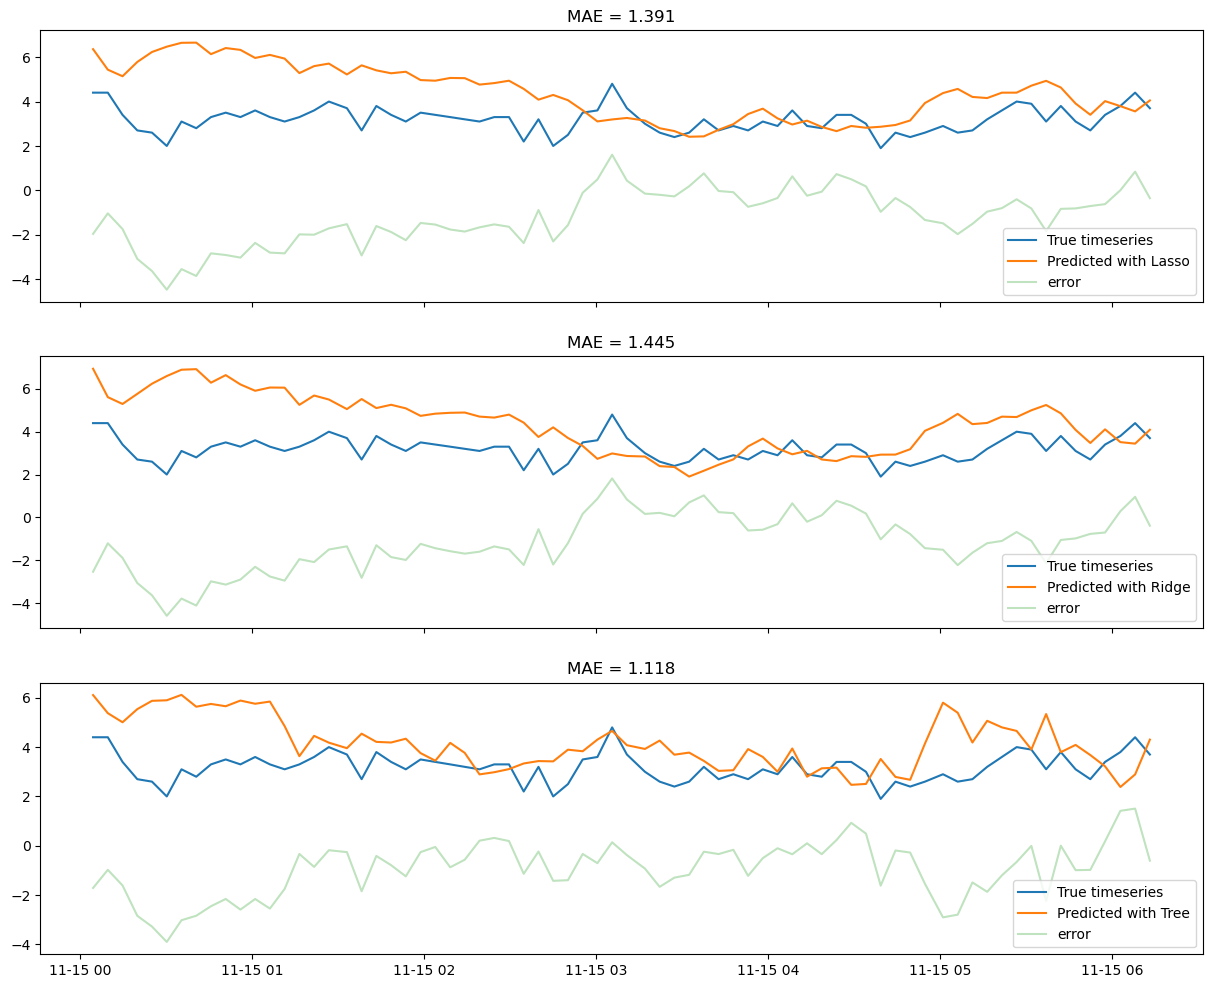

In [125]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15,12))


ax[0].set_title('MAE = {:.3f}'.format(mean_absolute_error(_r['y'], _r['y_pred_lasso'])))
ax[0].plot(time, _r['y'], label='True timeseries')
ax[0].plot(time, _r['y_pred_lasso'], label='Predicted with Lasso')
ax[0].plot(time, _r['y'] - _r['y_pred_lasso'], label='error', alpha=.3)
ax[0].legend()

ax[1].set_title('MAE = {:.3f}'.format(mean_absolute_error(_r['y'], _r['y_pred_ridge'])))
ax[1].plot(time, _r['y'], label='True timeseries')
ax[1].plot(time, _r['y_pred_ridge'], label='Predicted with Ridge')
ax[1].plot(time, _r['y'] - _r['y_pred_ridge'], label='error', alpha=.3)
ax[1].legend()

ax[2].set_title('MAE = {:.3f}'.format(mean_absolute_error(_r['y'], _r['y_pred_tree'])))
ax[2].plot(time, _r['y'], label='True timeseries')
ax[2].plot(time, _r['y_pred_tree'], label='Predicted with Tree')
ax[2].plot(time, _r['y'] - _r['y_pred_tree'], label='error', alpha=.3)
ax[2].legend();

Для предсказание на большее число шагов (предсказательный горизонт > K) и в этом случае придется использовать предсказанные значения временного ряда

> 5. Постройте предсказания для следующих 24 тайм степов.
> 6. Напишите пайплайн отбора гиперпараметров модели (ориентироваться нужно на значения ошибки на ТЕСТЕ)
> 7. Опишите разумную (на ваш взгляд) схему предсказания временного ряда.
> 8. В качестве признаков добавьте признаки из файлов forecast_ecmwf.csv, forecast_gfs.csv, forecast_icon_global.csv. Обратите внимания поскольку это 6 часовые предсказательные модели, для своей предсказательной модели вы можете генерить признаки из будущего(предсказанного а не истинного)!

## P.S. Третий способ.

На самом деле вы можете создавать индивидуальные модели для предсказания на K шагов вперед:
отдельная модель для предсказания на 1 шаг вперд
отдельная модель для предсказания на 2 шага вперед
и так далее.

> 9. Вопрос: Почему это может быть лучше чем Вариант 1 или Вариант 2?